In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gt_df = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_5/Mid_bootcamp_project/Data/Raw/globalterrorismr.csv', encoding = 'ISO-8859-1')

/var/folders/h1/sm0yz6nx7m9cgsn8627qx6c00000gn/T/ipykernel_32481/2132931928.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  gt_df = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_5/Mid_bootcamp_project/Data/Raw/globalterrorismr.csv', encoding = 'ISO-8859-1')


In [3]:
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
attacks_per_country = gt_df.groupby('country_txt').size().reset_index(name='count').sort_values(by='count', ascending = False)
top10_countries = attacks_per_country.head(10)

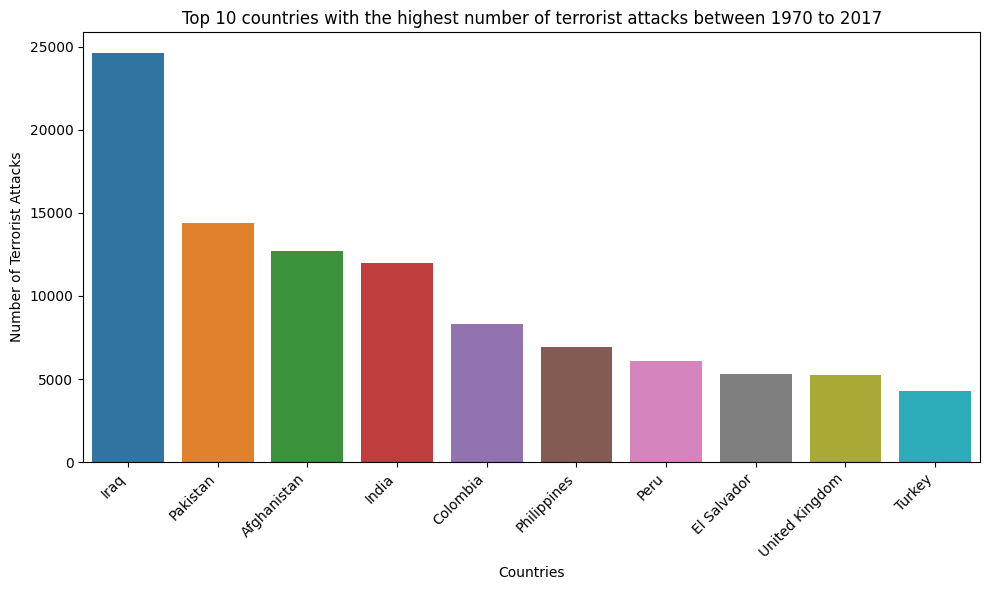

In [8]:
plt.figure(figsize=(10, 6))  # Adjusted the figure size as needed
ax = sns.barplot(x='country_txt', y='count', data=top10_countries)
ax.set_title('Top 10 countries with the highest number of terrorist attacks between 1970 to 2017')
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Terrorist Attacks')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

plt.tight_layout()  # Adjust the layout of x-axis 
plt.show()

In [5]:
last5_df = gt_df[gt_df['iyear'] >= 2012]
last5_df_count = last5_df.groupby(['iyear', 'country_txt']).size().reset_index(name='count')

# top 5 countries for each year
last5_df_count_5 = last5_df_count.groupby('iyear').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

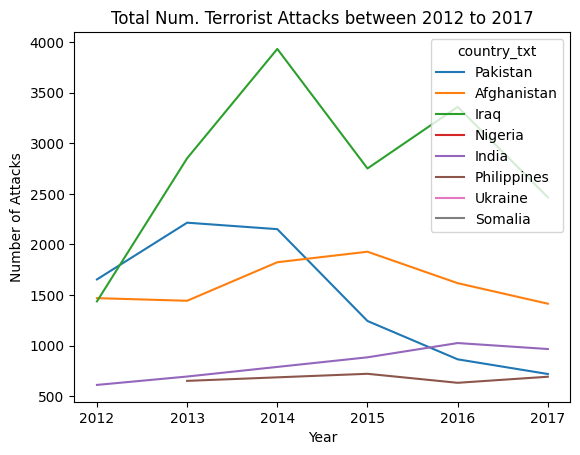

In [6]:
sns.lineplot(x='iyear', y='count', hue='country_txt', data=last5_df_count_5)
plt.title('Total Num. Terrorist Attacks between 2012 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()